# LAB SESSION: IMAGE PROCESSING

#### What is Image Processing?

Image Processing is the field of manipulating and analyzing images to extract useful information or enhance their visual appeal.

- **Healthcare**: Detect tumors in MRI scans.

- **Autonomous Vehicles**: Detect road lanes and obstacles.

- **Social Media**: Apply filters and recognize faces.



#### Digital Representation of an Image:
An image is essentially a **matrix of numbers** representing pixel intensities.

1. **Grayscale Image**: A single-channel 2D matrix where each value represents intensity (e.g., 0 = black, 255 = white). 

2. **RGB Image**: A 3D matrix with dimensions **Height × Width × Channels**, where each channel represents the intensity of **Red**, **Green**, or **Blue**.



#### Example of a Grayscale Image:
A 5×5 grayscale image can be represented as:


\begin{bmatrix}
0 & 50 & 100 & 150 & 200 \\
25 & 75 & 125 & 175 & 225 \\
50 & 100 & 150 & 200 & 250 \\
75 & 125 & 175 & 225 & 255 \\
100 & 150 & 200 & 250 & 255 \\
\end{bmatrix}


Here, each value represents the pixel intensity:  
- **0** is black,

- **255** is white, 

- Intermediate values are shades of gray (light gray...).



#### RGB Image:
An RGB image is represented as **three matrices stacked together**, one for each color channel (Red, Green, and Blue).

- Each channel contains values from **0 to 255**, which correspond to the intensity of that color at each pixel. 

- Combining these channels forms a full-color image.

For example:

$\text{Red Channel}$ =
\begin{bmatrix}
255 & 0 & 0 & 0 & 255 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\end{bmatrix},
$\quad
\text{Green Channel}$ =
\begin{bmatrix}
0 & 255 & 0 & 0 & 255 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\end{bmatrix},
$\quad
\text{Blue Channel}$ =
\begin{bmatrix}
0 & 0 & 255 & 0 & 255 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\end{bmatrix}


By stacking these layers, the final color image is formed.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('../../fig/gravity.jpg')
image_gray = cv2.imread('../../fig/gravity.jpg', cv2.IMREAD_GRAYSCALE)
print("Image_gray shape:", image_gray.shape)
print("Image shape:", image.shape)  # Prints (Height, Width, Channels)

Image_gray shape: (900, 1200)
Image shape: (900, 1200, 3)


#### Load and Display an Image

- Use OpenCV to load an image.

- OpenCV reads images in BGR format, so we convert it to RGB for correct visualization.

- Use Matplotlib to display the image.


Let's use this **3x3 matrix** as an example:



\begin{bmatrix}
0 & 100 & 255 \\
50 & 150 & 200 \\
25 & 75 & 175 \\
\end{bmatrix}


 **Final Image Representation**:
 
\begin{bmatrix}
\textcolor{black}{0} & \textcolor{gray}{100} & \textcolor{white}{255} \\
\textcolor{gray}{50} & \textcolor{gray}{150} & \textcolor{lightgray}{200} \\
\textcolor{darkgray}{25} & \textcolor{darkgray}{75} & \textcolor{gray}{175} \\
\end{bmatrix}


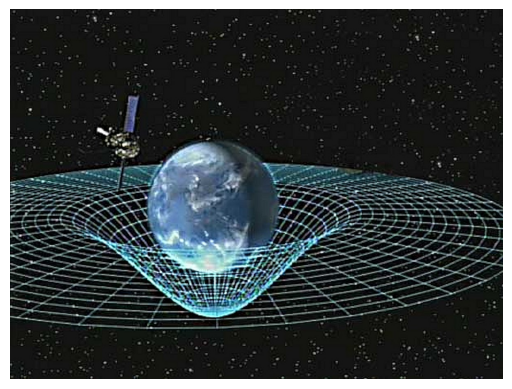

In [2]:
# Load and display an image
image = cv2.imread('../../fig/gravity.jpg')  # BGR format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Plot using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


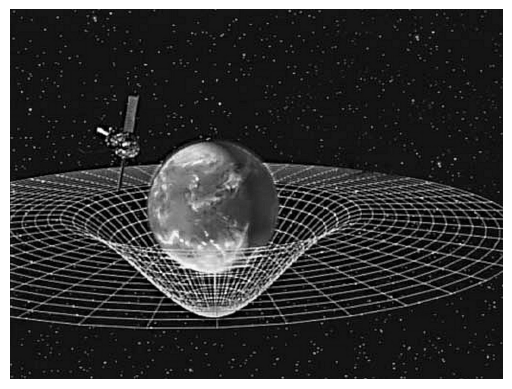

In [3]:
# Load the image in grayscale
image_gray = cv2.imread('../../fig/gravity.jpg', cv2.IMREAD_GRAYSCALE)  

# Plot the grayscale image using Matplotlib
plt.imshow(image_gray, cmap='gray')  # Use 'gray' colormap to display it properly
plt.axis('off')  
plt.show()

## Basic Image Manipulations



####  Cropping 
Cropping an image involves selecting a subset of the matrix by slicing its rows and columns.

Let's do a cropping here:
\begin{bmatrix}
   10 & 20 & 30 & 40 & 50 \\
   15 & 25 & 35 & 45 & 55 \\
   20 & 30 & 40 & 50 & 60 \\
   25 & 35 & 45 & 55 & 65 \\
   30 & 40 & 50 & 60 & 70 \\
   \end{bmatrix}

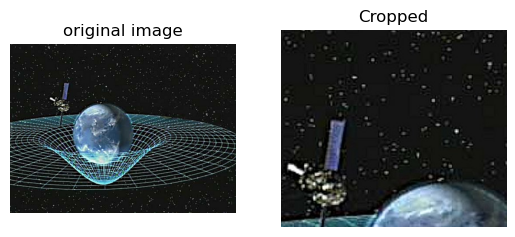

In [ ]:
# Crop image
cropped_image = image_rgb[50:400, 200:600]  # Crop rows and columns

# Display
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cropped_image)
plt.title('Cropped')
plt.axis('off')

plt.show()


####  Resizing

Resizing changes the dimensions of the matrix, reducing or increasing the number of rows and columns. It wors by:

1- Downsampling:  grouping pixels (blocks) and summarizing them, often by averaging, minimum or maximum. This process reduces the resolution of the image but retains an approximation of its structure.

Let's downsample this $5 \times 5$ matrix into a $3 \times 3$ matrix
\begin{bmatrix}
   10 & 20 & 30 & 40 & 50 \\
   15 & 25 & 35 & 45 & 55 \\
   20 & 30 & 40 & 50 & 60 \\
   25 & 35 & 45 & 55 & 65 \\
   30 & 40 & 50 & 60 & 70 \\
   \end{bmatrix}

2- Upsampling: It involves increasing the size of an image by creating more pixels from the existing data. Interpolates to add new pixels.

  -   Nearest Neighbor Interpolation: The simplest method. Each      pixel   is replicated to fill the larger grid

  - Bilinear Interpolation:Estimates new pixel values by averaging the nearest neighbors (linearly interpolating between values).



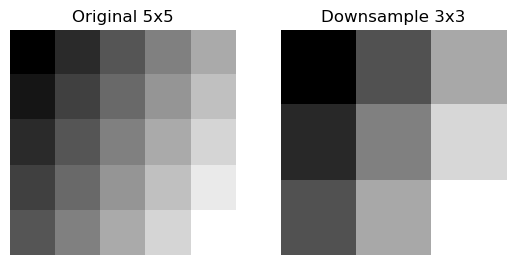

In [5]:
# Original matrix (as an image)
image1 = np.array([[10, 20, 30, 40, 50],
                  [15, 25, 35, 45, 55],
                  [20, 30, 40, 50, 60],
                  [25, 35, 45, 55, 65],
                  [30, 40, 50, 60, 70]], dtype=np.uint8)

# Downsample using OpenCV's 
Downsample_image = cv2.resize(image1, (3, 3))

# Display original and upsampled images
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title("Original 5x5")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Downsample_image, cmap='gray')
plt.title("Downsample 3x3")
plt.axis('off')

plt.show()

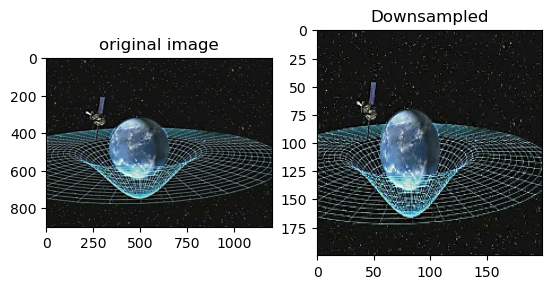

In [6]:
# Downsample image
resized_image = cv2.resize(image_rgb, (200, 200))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('original image')
#plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Downsampled')
#plt.axis('off')
plt.show()

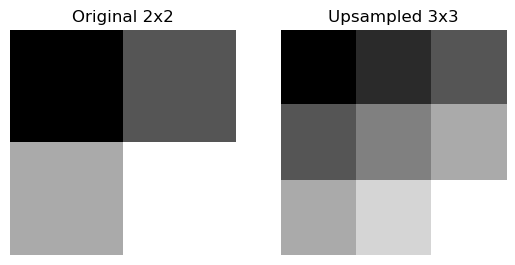

In [7]:
# Original matrix (as an image)
image2 = np.array([[10, 20],
                  [30, 40]], dtype=np.uint8)

# Upsample using OpenCV's resize method (bilinear interpolation)
upsampled_image = cv2.resize(image2, (3, 3), interpolation=cv2.INTER_LINEAR)

# Display original and upsampled images
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title("Original 2x2")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(upsampled_image, cmap='gray')
plt.title("Upsampled 3x3")
plt.axis('off')

plt.show()


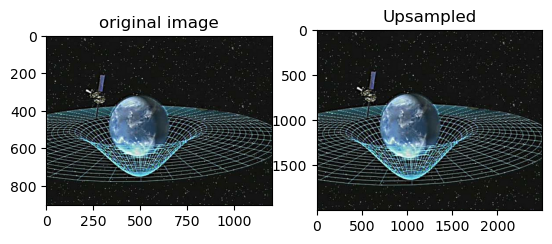

In [8]:
# Upsample using OpenCV's resize method (bilinear interpolation)
upsampled_image = cv2.resize(image_rgb, (2500, 2000), interpolation=cv2.INTER_LINEAR)

# Display original and upsampled images
plt.subplot(1, 2, 1)
plt.imshow(image_rgb, cmap='gray')
plt.title('original image')
#plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(upsampled_image)
plt.title("Upsampled")
#plt.axis('off')

plt.show()

#### Color Channel Manipulation

An RGB image is a 3D array with three channels: Red (R), Green (G), and Blue (B). Each channel represents the intensity of that color at each pixel

Let's consider this 3×3 RGB image as a matrix where each pixel is represented by an [R, G, B] vector:

\begin{bmatrix}
[255, 0, 0] & [0, 255, 0] & [0, 0, 255] \\
[255, 255, 0] & [0, 255, 255] & [255, 0, 255] \\
[128, 128, 128] & [255, 255, 255] & [0, 0, 0] \\
\end{bmatrix}


Each pixel corresponds to:
- $[255, 0, 0]$: Full red, no green or blue (pure or bright red) 

- $[0, 255, 0]$: Full green, no red or blue (pure or bright green)

- $[0, 0, 255]$: Full blue, no red or green (pure or bright blue)

- $[128, 128, 128]$: Gray

- $[255, 255, 255]$: White

- $[0, 0, 0]$: Black

 slicing operation:
 
   $
   \text{Red Channel: } \text{image[:, :, 0]}
   $
   This extracts the first channel (Red) for every row and column.

 Resulting 2D matrix (Red channel):

   \begin{bmatrix}
   255 & 0 & 0 \\
   255 & 255 & 0 \\
   128 & 128 & 128 \\
   \end{bmatrix}
   

   Each value corresponds to the intensity of red for that pixel.


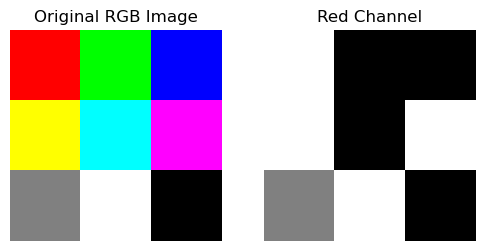

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a 3x3 RGB matrix (3D array)
image3 = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],  # First row
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],  # Second row
    [[128, 128, 128], [255, 255, 255], [0, 0, 0]]   # Third row
])

# Step 2: Extract the red channel
red_channel = image3[:, :, 0]

# Step 3: Visualize the original RGB image and the red channel
plt.figure(figsize=(6, 4))

# Original RGB image
plt.subplot(1, 2, 1)
plt.imshow(image3.astype(np.uint8))  # Display as an image
plt.title("Original RGB Image")
plt.axis("off")

# Red channel (grayscale)
plt.subplot(1, 2, 2)
plt.imshow(red_channel, cmap='gray')  # Display red channel in grayscale
plt.title("Red Channel")
plt.axis("off")

plt.show()


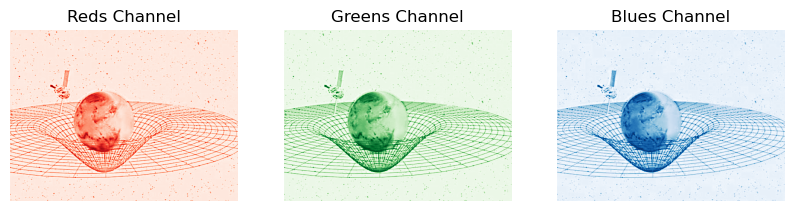

In [10]:
# Extract channels
red_channel = image_rgb[:, :, 0]
green_channel = image_rgb[:, :, 1]
blue_channel = image_rgb[:, :, 2]

# Display channels
plt.figure(figsize=(10, 4))
for i, (channel, color) in enumerate(zip([red_channel, green_channel, 
                                blue_channel], ['Reds', 'Greens', 'Blues'])):
    plt.subplot(1, 3, i+1)
    plt.imshow(channel, cmap=color)
    plt.title(f"{color} Channel")
    plt.axis('off')
plt.show()


### Image Filters and Transformations



####  Grayscale Conversion

A grayscale image has only one channel where each pixel represents intensity (brightness) rather than color. The intensity is calculated by combining the Red (R), Green (G), and Blue (B) channels using a weighted formula.

$$
\text{Gray} = 0.299R + 0.587G + 0.114B
$$

- **Why these weights?**

  - Human eyes are more sensitive to green light, so **green (G)** has the largest weight.

  - Red (R) is next in importance, and Blue (B) has the smallest weight.

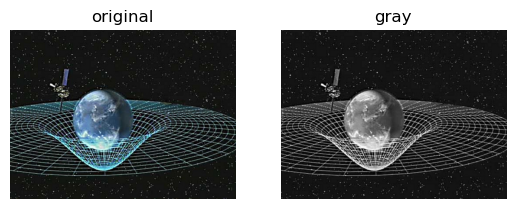

In [12]:
# Convert to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# Display results
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('gray')
plt.axis('off')
plt.show()
